In [1]:
from theano import theano, tensor as tt
import pymc3 as pm
import pandas as pd
from sklearn import datasets
import numpy as np
from numpy import random
import pylab as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
with pm.Model() as model:
    t = pm.Normal('t', 0, 1, shape = (150, 2))
    v = pm.Normal('v', 0, 1, shape = (2, 4))
    m = pm.Normal('m', 0, 1, shape = 4)
    sd = pm.Gamma('sd', 1, 1)
    x = pm.Normal('x', pm.math.dot(t, v)+m, sd, observed = X)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(1000, start=start, step=step)

Optimization terminated successfully.
         Current function value: 1206.282652
         Iterations: 11
         Function evaluations: 21
         Gradient evaluations: 21


100%|██████████| 1000/1000 [01:22<00:00, 12.15it/s]


In [4]:
Xnew = trace["t"][-1]

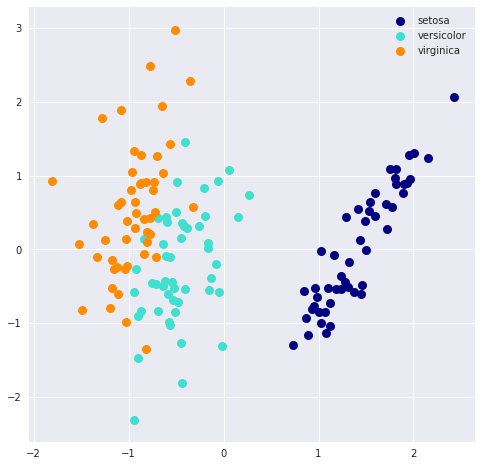

In [5]:
colors = ['navy', 'turquoise', 'darkorange']
plt.figure(figsize=(8, 8))

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(Xnew[y == i, 0], Xnew[y == i, 1], color=color, lw=2, label=target_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.show()